<a href="https://colab.research.google.com/github/Yi-Wei-Lin/Tibame_ML_20210602/blob/main/cifar10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [7]:
names = ["ariplane",
      "automobile",
      "bird",
      "cat",
      "deer",
      "dog",
      "frog",
      "horse",
      "ship",
      "truck"
      ]

truck


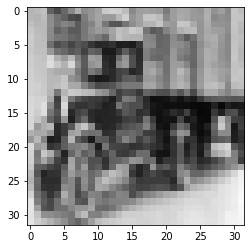

In [8]:
# mnist: (60000, ) [5,2,1,0]
import matplotlib.pyplot as plt
import random
idx = random.randint(0,49999)
ans = y_train[idx][0]
print(names[ans])
plt.imshow(x_train[idx])